In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
pd.options.display.width = 1000

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_delta_others_plus_MGC_remove.csv")
DPP_DTT_df = DPP_DTT_df.drop(labels = 'blend_conjugated_polymer', axis = 1)
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,solvent_boiling_point,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent
0,4.00,299.00,3.32,0.110000,1,1,132.0,0,0,0
1,4.00,299.00,3.32,0.290000,1,1,132.0,0,1,0
2,4.00,299.00,3.32,0.230000,1,1,132.0,0,1,0
3,4.00,299.00,3.32,0.730000,1,1,132.0,0,1,0
4,4.00,299.00,3.32,1.860000,1,1,132.0,0,1,0
5,4.00,299.00,3.32,0.210000,1,1,132.0,0,1,0
6,4.00,299.00,3.32,0.340000,1,1,132.0,0,1,0
7,4.00,299.00,3.32,0.240000,1,1,132.0,0,1,0
8,4.00,299.00,3.32,1.970000,1,1,132.0,0,1,0
9,4.00,299.00,3.32,0.690000,1,1,132.0,0,1,0


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'solvent_boiling_point',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent']

In [4]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)

## multicollinieary check

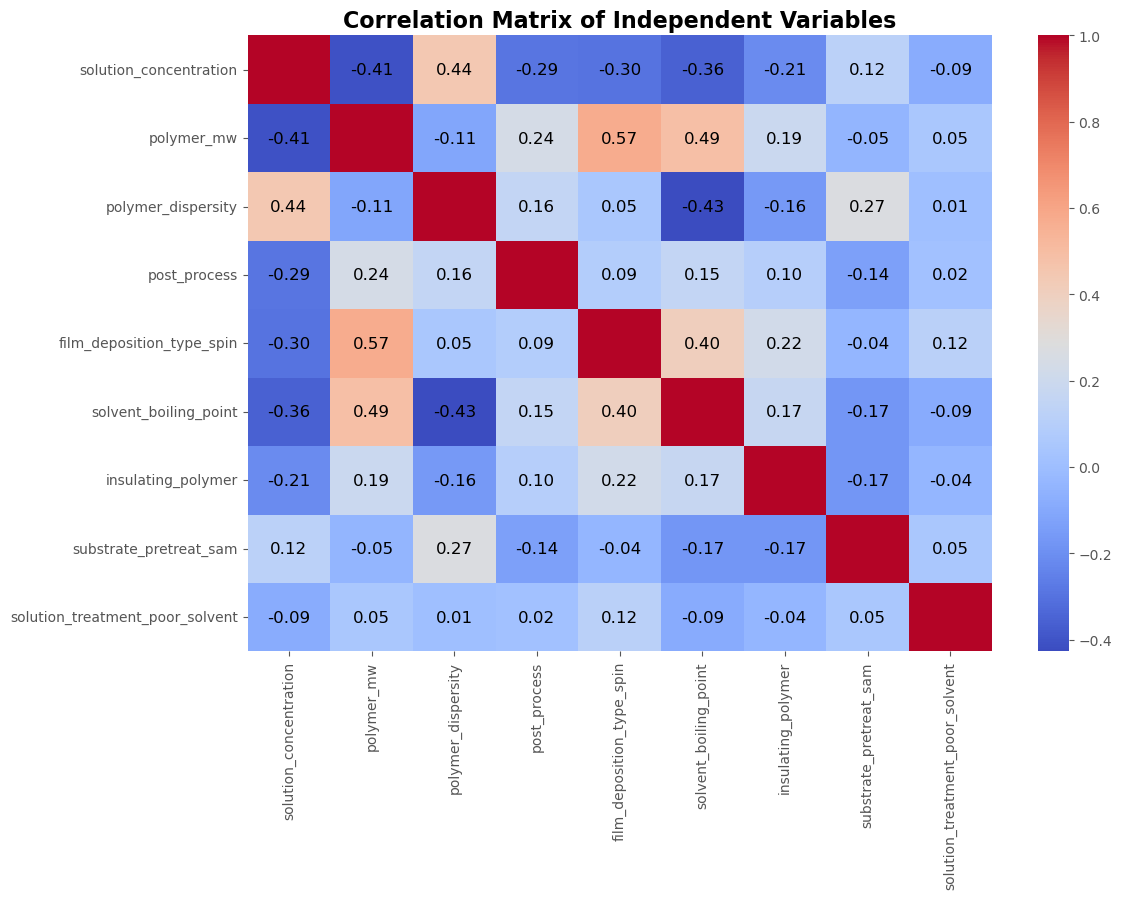

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the correlation matrix
correlation_matrix = DPP_DTT_X.corr()

# Check for NaN values and fill them with zeros
if correlation_matrix.isna().sum().sum() > 0:
    correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=False, 
                      fmt=".2f", 
                      cmap="coolwarm", 
                      cbar=True)

# Annotate only the non-zero and non-NaN correlations
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        # Only annotate non-diagonal, non-zero, non-NaN values
        if i != j and not np.isnan(corr_value) and corr_value != 0:
            heatmap.text(j + 0.5, i + 0.5, 
                         f"{corr_value:.2f}", 
                         ha='center', 
                         va='center', 
                         color='black', 
                         fontsize=12, 
                         )

plt.title("Correlation Matrix of Independent Variables", fontsize=16, fontweight='bold')
plt.show()


## w/o strandardscale

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Linear regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.517
R² score for test set: 0.249


## Polynomial regression

Degree 1: R² train = 0.517, R² test = 0.249
Degree 2: R² train = 0.277, R² test = -1.181
Degree 3: R² train = 0.830, R² test = 0.302
Degree 4: R² train = 0.830, R² test = -6742987057.926
Degree 5: R² train = 0.830, R² test = -351847960947.080
Degree 6: R² train = 0.829, R² test = -1111906100158.745


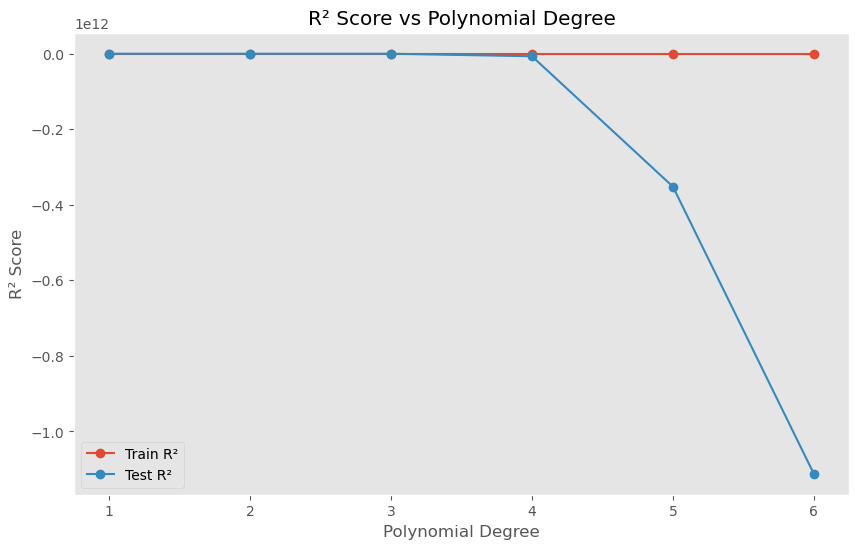

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

## Ridge regression

Alpha 0.1: R² train = 0.517, R² test = 0.253
Alpha 0.2: R² train = 0.517, R² test = 0.255
Alpha 0.3: R² train = 0.517, R² test = 0.257
Alpha 0.4: R² train = 0.516, R² test = 0.259
Alpha 0.5: R² train = 0.516, R² test = 0.261
Alpha 0.6: R² train = 0.516, R² test = 0.262
Alpha 0.7: R² train = 0.516, R² test = 0.263
Alpha 0.8: R² train = 0.515, R² test = 0.264
Alpha 0.9: R² train = 0.515, R² test = 0.265
Alpha 1.0: R² train = 0.515, R² test = 0.266


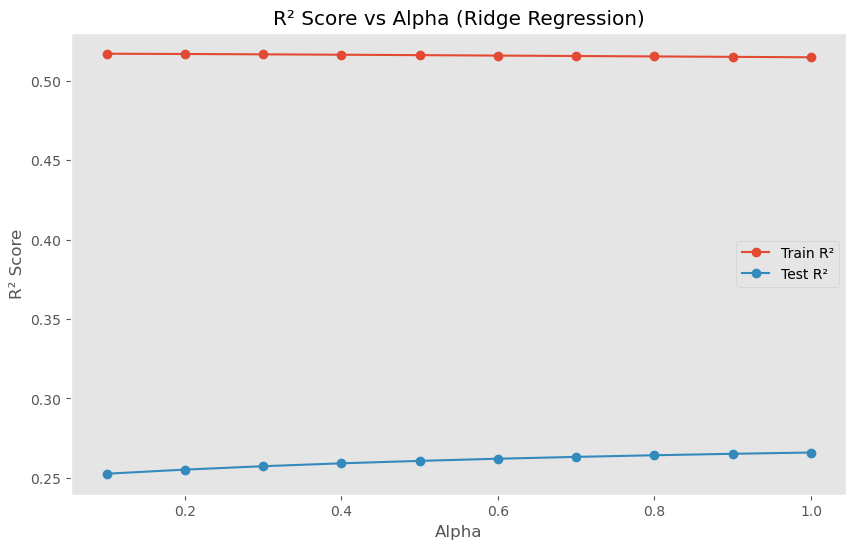

In [9]:
from sklearn.linear_model import Ridge

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()

## Lasso regression

Alpha 0.1: R² train = 0.450, R² test = 0.180
Alpha 0.2: R² train = 0.423, R² test = 0.115
Alpha 0.3: R² train = 0.410, R² test = 0.079
Alpha 0.4: R² train = 0.391, R² test = 0.025
Alpha 0.5: R² train = 0.366, R² test = -0.044
Alpha 0.6: R² train = 0.352, R² test = -0.079
Alpha 0.7: R² train = 0.350, R² test = -0.076
Alpha 0.8: R² train = 0.348, R² test = -0.074
Alpha 0.9: R² train = 0.347, R² test = -0.072
Alpha 1.0: R² train = 0.347, R² test = -0.072


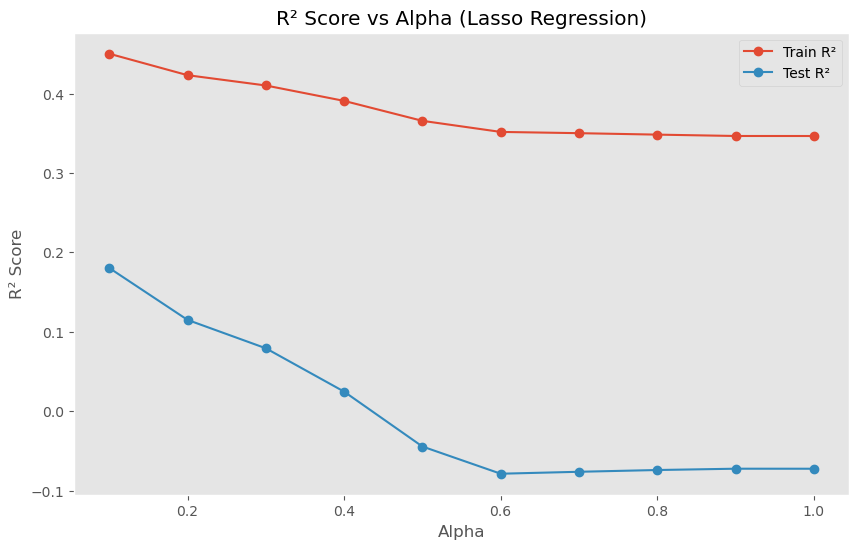

In [10]:
from sklearn.linear_model import Lasso

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()

## Elsaticnet regression

In [11]:
from sklearn.linear_model import ElasticNet

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.491699  0.260878
1     0.1       0.2  0.488173  0.255454
2     0.1       0.3  0.484090  0.248505
3     0.1       0.4  0.479079  0.239996
4     0.1       0.5  0.473548  0.229990
5     0.1       0.6  0.469164  0.219263
6     0.1       0.7  0.463850  0.206062
7     0.1       0.8  0.460132  0.199362
8     0.1       0.9  0.455645  0.190957
9     0.1       1.0  0.450169  0.180359
10    0.2       0.1  0.473974  0.229731
11    0.2       0.2  0.465762  0.213604
12    0.2       0.3  0.457344  0.195159
13    0.2       0.4  0.449757  0.177857
14    0.2       0.5  0.441968  0.161395
15    0.2       0.6  0.432001  0.139438
16    0.2       0.7  0.426696  0.125989
17    0.2       0.8  0.425634  0.122594
18    0.2       0.9  0.424454  0.118944
19    0.2       1.0  0.423145  0.114988
20    0.3       0.1  0.460523  0.201233
21    0.3       0.2  0.449530  0.177424
22    0.3       0.3  0.439948  0.155321
23    0.3       0.4  0.428867  0.129950


## Support Vector Regression (SVR)

In [12]:
from sklearn.svm import SVR

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train.ravel())  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

    C  epsilon  r2_train   r2_test
0   1      0.1  0.488875  0.127206
1   1      0.2  0.497283  0.167448
2   1      0.3  0.491915  0.179252
3   1      0.4  0.485257  0.190904
4   1      0.5  0.498542  0.209469
5   1      0.6  0.504898  0.165749
6   1      0.7  0.506017  0.136413
7   1      0.8  0.501474  0.097863
8   1      0.9  0.491250  0.055681
9   1      1.0  0.475603 -0.004077
10  1      1.1  0.453350 -0.074460
11  2      0.1  0.544127  0.054966
12  2      0.2  0.558848  0.050776
13  2      0.3  0.563892  0.029573
14  2      0.4  0.576087  0.041781
15  2      0.5  0.572908  0.048035
16  2      0.6  0.575688  0.071231
17  2      0.7  0.580897  0.080362
18  2      0.8  0.578160  0.045243
19  2      0.9  0.571572  0.000732
20  2      1.0  0.561563 -0.051055
21  2      1.1  0.534904 -0.135327
22  3      0.1  0.571676 -0.040152
23  3      0.2  0.573928 -0.012667
24  3      0.3  0.582201  0.023249
25  3      0.4  0.581670  0.046004
26  3      0.5  0.583886  0.072195
27  3      0.6  0.58

## Decision tree regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.345


## Random forest regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828354  0.359817
25           350  0.828333  0.359682
27           370  0.828382  0.358275
24           340  0.828248  0.356829
28           380  0.828318  0.356377
21           310  0.828278  0.354731
29           390  0.828277  0.354530
30           400  0.828330  0.354000
23           330  0.828230  0.353505
22           320  0.828327  0.352445


## Gradient bossting regression

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828354  0.359817
25           350  0.828333  0.359682
27           370  0.828382  0.358275
24           340  0.828248  0.356829
28           380  0.828318  0.356377
21           310  0.828278  0.354731
29           390  0.828277  0.354530
30           400  0.828330  0.354000
23           330  0.828230  0.353505
22           320  0.828327  0.352445


## K-nearest Neighbors Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
15           16  0.590544  0.489892
13           14  0.633907  0.485573
14           15  0.616637  0.484773
12           13  0.658367  0.464428
11           12  0.681488  0.426724
10           11  0.694497  0.384798
9            10  0.706420  0.290039
8             9  0.726733  0.219807
7             8  0.730476  0.216519
6             7  0.757273  0.071738


## XGB regression

In [17]:
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
162            110            0.1          3  0.829460  0.350879
322            120            0.1          3  0.829509  0.350678
2              100            0.1          3  0.829391  0.350649
482            130            0.1          3  0.829558  0.350111
642            140            0.1          3  0.829604  0.349352
802            150            0.1          3  0.829653  0.349190
1922           220            0.1          3  0.829753  0.348918
18             100            0.2          3  0.829744  0.348848
2082           230            0.1          3  0.829758  0.348825
962            160            0.1          3  0.829678  0.348701


## Adaboost regression

In [18]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
        model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
        # Train the model
        model.fit(X_train, y_train.ravel())
            
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
            
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        # Append results
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  learning_rate  r2_train   r2_test
0             100            0.1  0.772376  0.749187
20            120            0.1  0.772376  0.749187
40            140            0.1  0.772376  0.749187
50            150            0.1  0.772376  0.749187
60            160            0.1  0.772376  0.749187
70            170            0.1  0.772376  0.749187
80            180            0.1  0.772376  0.749187
90            190            0.1  0.772376  0.749187
100           200            0.1  0.772376  0.749187
120           220            0.1  0.772376  0.749187


## K-fold validation with Adabossting regression

In [19]:
from sklearn.model_selection import KFold

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = DPP_DTT_X.iloc[train_index], DPP_DTT_X.iloc[test_index]
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.823740     0.677670
1   3      0.785533     0.770466
2   4      0.785668     0.780948
3   5      0.783541     0.748757
4   6      0.781494     0.696720
5   7      0.781461     0.681043
6   8      0.781020     0.715883
7   9      0.778590     0.672144
8  10      0.779740     0.514409


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Important x values from adaboosting regresion

In [20]:
# Example dataset (replace with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.590273
5            solvent_boiling_point    0.136757
6               insulating_polymer    0.115235
4        film_deposition_type_spin    0.095113
2               polymer_dispersity    0.047004
7           substrate_pretreat_sam    0.009256
0           solution_concentration    0.006362
3                     post_process    0.000000
8  solution_treatment_poor_solvent    0.000000


## w/ Stnadard scaler only X

In [6]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [7]:
print(X_train.mean())
print(X_train.std())
print(X_test.mean())
print(X_test.std())
print(y_train.mean())
print(y_train.std())
print(y_test.mean())
print(y_test.std())

-6.443167599293838e-17
1.0
0.023966041918706535
0.8862683744327745
0.9459051502314049
1.8709501987623551
0.7045943373225805
1.2123500294196865


## Linear regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.517
R² score for test set: 0.249


## Polynomial regression

Degree 1: R² train = 0.517, R² test = 0.249
Degree 2: R² train = 0.358, R² test = -2724970888629614280704.000
Degree 3: R² train = 0.830, R² test = 0.340
Degree 4: R² train = 0.830, R² test = -2450659674001.667
Degree 5: R² train = 0.830, R² test = -559586.479
Degree 6: R² train = 0.830, R² test = -188526.849


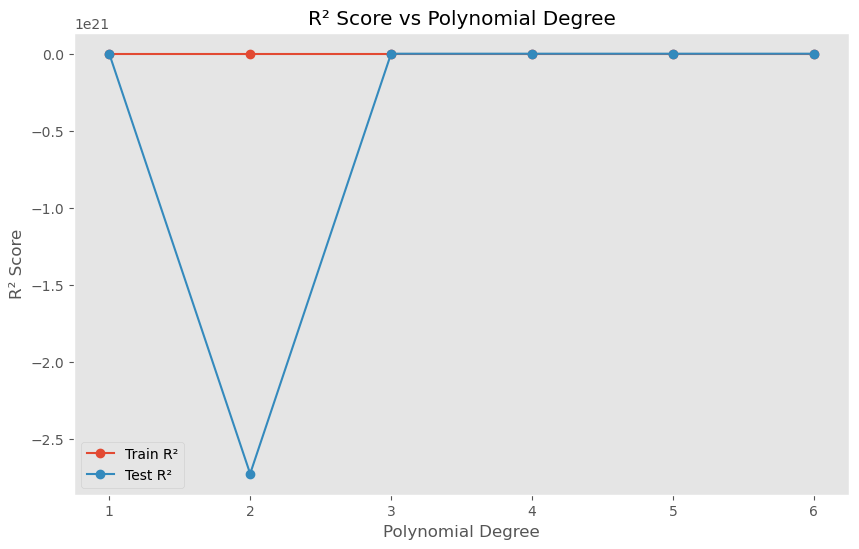

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

## Bayesian Optimization for polynomial regression

|   iter    |  target   |  degree   |
-------------------------------------
| 1         | -1.434e+2 | 4.371     |
| 2         | -3.93e+24 | 9.556     |
| 3         | -6.249e+2 | 7.588     |
| 4         | -2.127e+2 | 6.388     |
| 5         | -9.008e+2 | 2.404     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 6         | -1.434e+2 | 4.273     |
| 7         | -1.257e+2 | 8.502     |
| 8         | -1.304    | 1.0       |
| 9         | -3.792e+2 | 3.269     |
| 10        | -1.304    | 1.666     |
| 11        | -3.93e+24 | 9.999     |
| 12        | -1.257e+2 | 8.012     |
| 13        | -3.93e+24 | 9.017     |
| 14        | -3.792e+2 | 3.701     |
| 15        | -1.434e+2 | 4.935     |
| 16        | -9.008e+2 | 2.851     |
| 17        | -1.304    | 1.32      |
| 18        | -9.008e+2 | 2.007     |
| 19        | -1.434e+2 | 4.716     |
| 20        | -6.249e+2 | 7.774     |
| 21        | -3.792e+2 | 3.959     |
| 22        | -1.257e+2 | 8.75      |
| 23        | -3.792e+2 | 3.468     |
| 24        | -3.93e+24 | 9.791     |
| 25        | -1.257e+2 | 8.254     |
| 26        | -1.304    | 1.499     |
| 27        | -1.304    | 1.137     |
| 28        | -1.434e+2 | 4.839     |
| 29        | -3.93e+24 | 9.294     |
| 30        | -1.434e+2 | 4.547     |
| 31        | -1.434e+2 | 4.109     |
| 32        

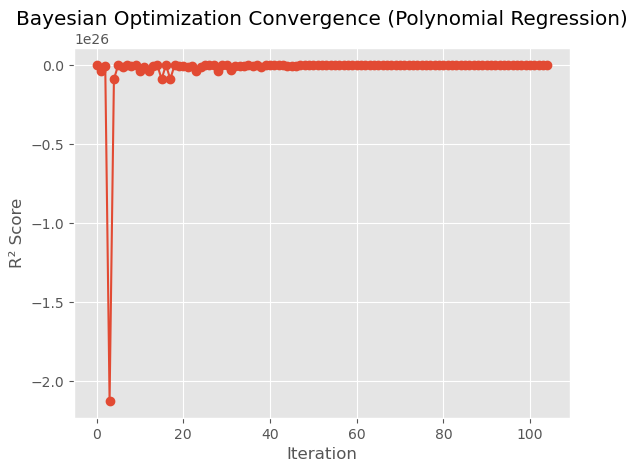

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bayes_opt import BayesianOptimization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(degree):
    degree = int(degree)  # Convert degree to an integer

    # Create Polynomial Regression model
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for polynomial degree (1 to 10)
search_space = {
    "degree": (1, 10)  # Range of polynomial degrees
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameter
best_params = optimizer.max["params"]
best_degree = int(best_params["degree"])
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (Polynomial Regression)")
plt.show()

## Ridge regression

Alpha 1.0: R² train = 0.517, R² test = 0.254
Alpha 2.0: R² train = 0.517, R² test = 0.258
Alpha 3.0: R² train = 0.517, R² test = 0.262
Alpha 4.0: R² train = 0.517, R² test = 0.265
Alpha 5.0: R² train = 0.516, R² test = 0.269
Alpha 6.0: R² train = 0.516, R² test = 0.273
Alpha 7.0: R² train = 0.516, R² test = 0.276
Alpha 8.0: R² train = 0.515, R² test = 0.280
Alpha 9.0: R² train = 0.515, R² test = 0.283
Alpha 10.0: R² train = 0.514, R² test = 0.287
Alpha 11.0: R² train = 0.514, R² test = 0.290
Alpha 12.0: R² train = 0.513, R² test = 0.293
Alpha 13.0: R² train = 0.513, R² test = 0.296
Alpha 14.0: R² train = 0.512, R² test = 0.299
Alpha 15.0: R² train = 0.512, R² test = 0.302
Alpha 16.0: R² train = 0.511, R² test = 0.305
Alpha 17.0: R² train = 0.511, R² test = 0.307
Alpha 18.0: R² train = 0.510, R² test = 0.310
Alpha 19.0: R² train = 0.509, R² test = 0.313
Alpha 20.0: R² train = 0.509, R² test = 0.315
Alpha 21.0: R² train = 0.508, R² test = 0.318
Alpha 22.0: R² train = 0.507, R² test = 0.3

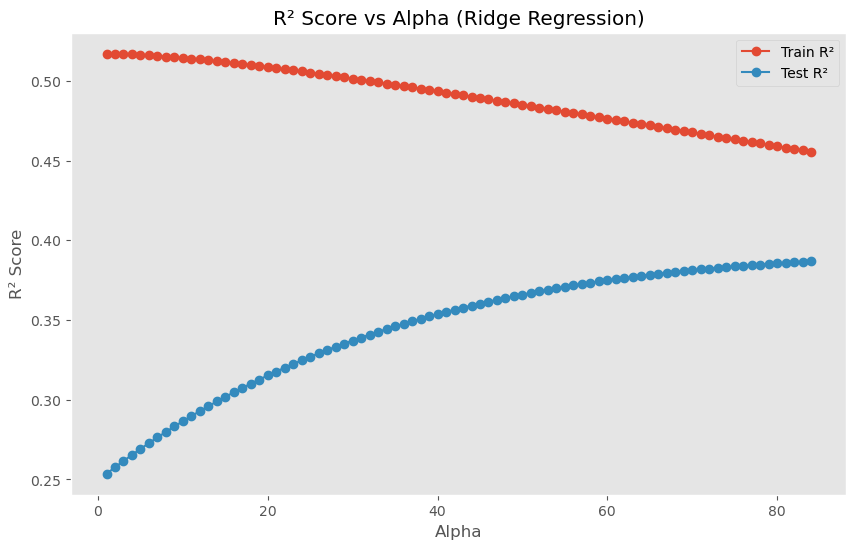

In [17]:
from sklearn.linear_model import Ridge

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(1, 85, 1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()

## Bayesian optimzation for ridge regression

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.3375    | 37.45     |
| 2         | 0.1851    | 95.07     |
| 3         | 0.2472    | 73.2      |
| 4         | 0.2867    | 59.87     |
| 5         | 0.2463    | 15.6      |
| 6         | 0.3236    | 45.85     |
| 7         | 0.3384    | 36.31     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 8         | 0.3384    | 31.1      |
| 9         | 0.3394    | 33.25     |
| 10        | 0.3394    | 34.16     |
| 11        | 0.3394    | 33.0      |
| 12        | 0.3394    | 33.71     |
| 13        | 0.3394    | 33.66     |
| 14        | 0.3394    | 33.63     |
| 15        | 0.3394    | 33.55     |
| 16        | 0.3394    | 33.76     |
| 17        | 0.3394    | 33.28     |
| 18        | 0.3394    | 33.8      |
| 19        | 0.3394    | 33.48     |
| 20        | 0.3394    | 33.78     |
| 21        | 0.3394    | 33.43     |
| 22        | 0.3394    | 33.75     |
| 23        | 0.3394    | 33.45     |
| 24        | 0.3394    | 33.77     |
| 25        | 0.3394    | 33.46     |
| 26        | 0.3394    | 33.54     |
| 27        | 0.3394    | 33.82     |
| 28        | 0.3394    | 33.48     |
| 29        | 0.3394    | 33.54     |
| 30        | 0.3394    | 33.6      |
| 31        | 0.3394    | 33.8      |
| 32        | 0.3394    | 33.48     |
| 33        | 0.3394    | 33.54     |
| 34        

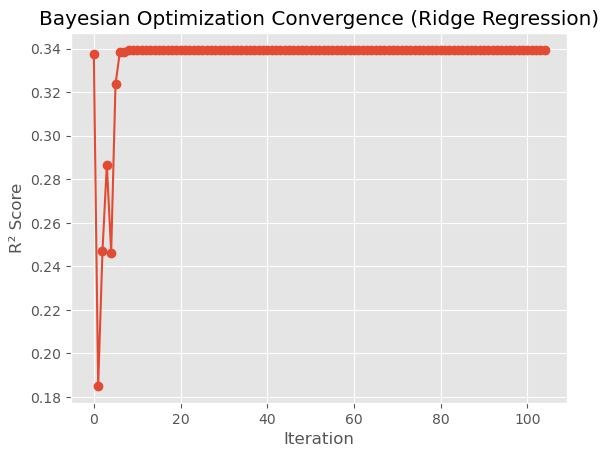

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(alpha):
    # Create Ridge Regression model
    model = Ridge(alpha=alpha)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for alpha (0.0001 to 10)
search_space = {
    "alpha": (0.0001, 100.0)
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameter
best_params = optimizer.max["params"]
best_alpha = best_params["alpha"]
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Alpha: {best_alpha:.4f}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (Ridge Regression)")
plt.show()


## Lasso regression

Alpha 0.10: R² train = 0.490, R² test = 0.264
Alpha 1.10: R² train = 0.000, R² test = -0.040
Alpha 2.10: R² train = 0.000, R² test = -0.040
Alpha 3.10: R² train = 0.000, R² test = -0.040
Alpha 4.10: R² train = 0.000, R² test = -0.040
Alpha 5.10: R² train = 0.000, R² test = -0.040
Alpha 6.10: R² train = 0.000, R² test = -0.040
Alpha 7.10: R² train = 0.000, R² test = -0.040
Alpha 8.10: R² train = 0.000, R² test = -0.040
Alpha 9.10: R² train = 0.000, R² test = -0.040
Alpha 10.10: R² train = 0.000, R² test = -0.040
Alpha 11.10: R² train = 0.000, R² test = -0.040
Alpha 12.10: R² train = 0.000, R² test = -0.040
Alpha 13.10: R² train = 0.000, R² test = -0.040
Alpha 14.10: R² train = 0.000, R² test = -0.040
Alpha 15.10: R² train = 0.000, R² test = -0.040
Alpha 16.10: R² train = 0.000, R² test = -0.040
Alpha 17.10: R² train = 0.000, R² test = -0.040
Alpha 18.10: R² train = 0.000, R² test = -0.040
Alpha 19.10: R² train = 0.000, R² test = -0.040
Alpha 20.10: R² train = 0.000, R² test = -0.040
Alp

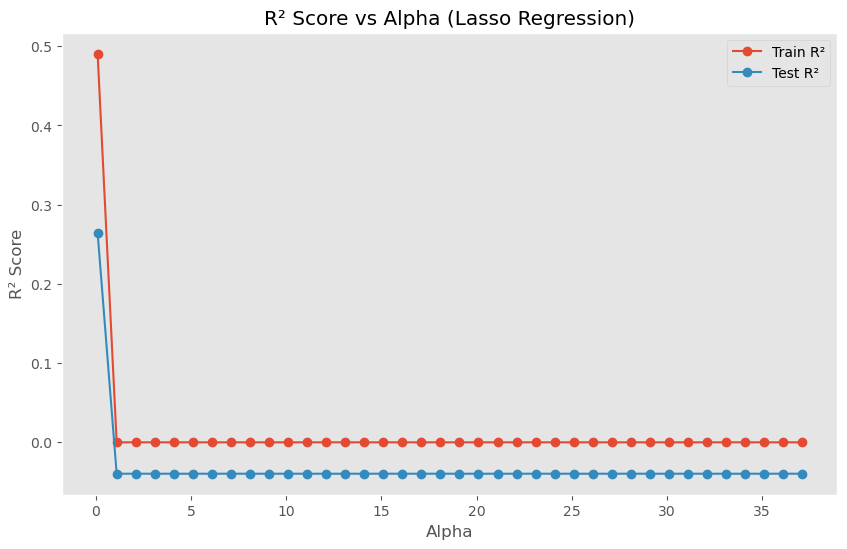

In [35]:
from sklearn.linear_model import Lasso

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 38, 1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.2f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()

## Bayesian optimization for Lasso regression

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | -0.4022   | 37.45     |
| 2         | -0.4022   | 95.07     |
| 3         | -0.4022   | 73.2      |
| 4         | -0.4022   | 59.87     |
| 5         | -0.4022   | 15.6      |
| 6         | -1.272    | 0.001263  |
| 7         | -0.4022   | 93.21     |
| 8         | -0.4022   | 25.89     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 9         | -0.4022   | 48.65     |
| 10        | -0.4022   | 82.24     |
| 11        | -0.4022   | 20.29     |
| 12        | -0.4022   | 66.45     |
| 13        | -0.4022   | 99.99     |
| 14        | -0.4022   | 31.93     |
| 15        | -0.4022   | 54.05     |
| 16        | -0.4022   | 43.02     |
| 17        | -0.4022   | 87.09     |
| 18        | -0.4022   | 77.57     |
| 19        | -0.4022   | 17.62     |
| 20        | -0.4022   | 63.18     |
| 21        | -0.4022   | 69.94     |
| 22        | -0.4022   | 28.98     |
| 23        | -0.4022   | 45.82     |
| 24        | -0.4022   | 89.93     |
| 25        | -0.4022   | 56.83     |
| 26        | -0.4022   | 23.06     |
| 27        | -0.4022   | 34.84     |
| 28        | -0.4022   | 97.99     |
| 29        | -0.4022   | 40.25     |
| 30        | -0.4022   | 51.36     |
| 31        | -0.4022   | 79.92     |
| 32        | -0.4022   | 84.71     |
| 33        | -0.4022   | 75.3      |
| 34        | -0.4022   | 68.17     |
| 35        

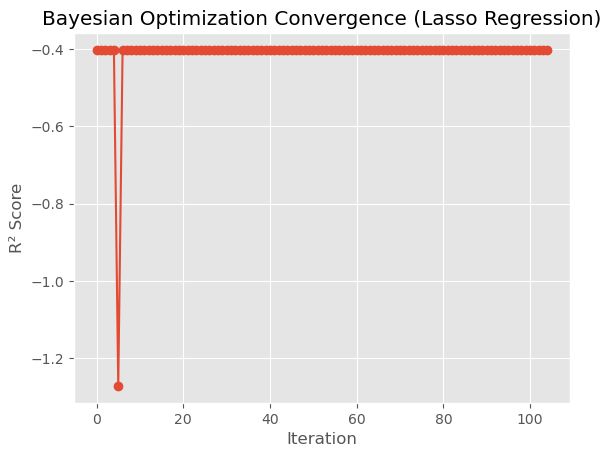

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(alpha):
    # Create Lasso Regression model (ensure convergence with high max_iter)
    model = Lasso(alpha=alpha, max_iter=10000)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for alpha (0.0001 to 10)
search_space = {
    "alpha": (0.0001, 100.0)
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameter
best_params = optimizer.max["params"]
best_alpha = best_params["alpha"]
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Alpha: {best_alpha:.4f}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (Lasso Regression)")
plt.show()


## Elsaticnet regression

In [27]:
from sklearn.linear_model import ElasticNet

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.512312  0.292127
1     0.1       0.2  0.510884  0.290379
2     0.1       0.3  0.509075  0.287870
3     0.1       0.4  0.506839  0.284496
4     0.1       0.5  0.504625  0.281550
5     0.1       0.6  0.502482  0.279211
6     0.1       0.7  0.500019  0.276359
7     0.1       0.8  0.497214  0.272939
8     0.1       0.9  0.494036  0.268938
9     0.1       1.0  0.490460  0.264293
10    0.2       0.1  0.502261  0.322936
11    0.2       0.2  0.497532  0.318743
12    0.2       0.3  0.492417  0.314546
13    0.2       0.4  0.486487  0.309499
14    0.2       0.5  0.479326  0.302786
15    0.2       0.6  0.472291  0.295030
16    0.2       0.7  0.465171  0.285731
17    0.2       0.8  0.456855  0.273950
18    0.2       0.9  0.448550  0.257192
19    0.2       1.0  0.439367  0.237463
20    0.3       0.1  0.489769  0.344127
21    0.3       0.2  0.481270  0.337821
22    0.3       0.3  0.471256  0.329948
23    0.3       0.4  0.461655  0.320936


## Bayesian optimzation for Elsaticnet regression

|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
| 1         | -0.4022   | 3.745     | 0.9507    |
| 2         | -0.4022   | 7.32      | 0.5987    |
| 3         | 0.1623    | 1.56      | 0.156     |
| 4         | 0.1698    | 0.5809    | 0.8662    |
| 5         | -0.4022   | 6.011     | 0.7081    |
| 6         | -0.4187   | 0.08785   | 0.001725  |
| 7         | -0.4022   | 8.284     | 0.3003    |
| 8         | 0.02532   | 1.014     | 0.5217    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 9         | 0.2006    | 0.5557    | 0.8587    |
| 10        | 0.2208    | 0.2072    | 0.9871    |
| 11        | -0.4022   | 1.838     | 0.6274    |
| 12        | 0.3375    | 1.175     | 0.004675  |
| 13        | 0.2969    | 0.7964    | 0.004326  |
| 14        | -0.4022   | 9.973     | 0.9698    |
| 15        | 0.04435   | 4.769     | 0.02188   |
| 16        | -0.4022   | 6.041     | 0.1517    |
| 17        | 0.1352    | 4.097     | 0.01009   |
| 18        | 0.2194    | 3.196     | 0.004392  |
| 19        | 0.2572    | 2.594     | 0.008854  |
| 20        | -0.4022   | 2.838     | 0.4634    |
| 21        | 0.3091    | 2.075     | 0.001811  |
| 22        | -0.4022   | 4.853     | 0.9851    |
| 23        | -0.4022   | 8.192     | 0.6808    |
| 24        | -0.06771  | 9.531     | 0.002048  |
| 25        | 0.1628    | 3.608     | 0.01303   |
| 26        | 0.2807    | 0.4236    | 0.5366    |
| 27        | 0.09835   | 0.1814    | 0.7039    |
| 28        | 0.2685    | 0.7304    | 0.2809    |


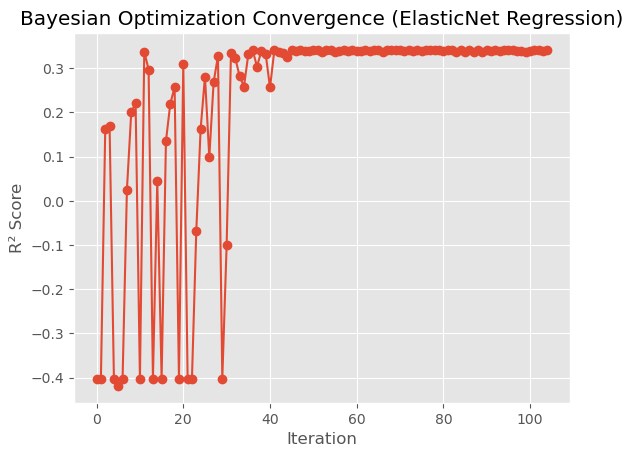

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(alpha, l1_ratio):
    # Create ElasticNet model (ensure convergence with high max_iter)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for alpha (regularization) and l1_ratio (L1 vs. L2)
search_space = {
    "alpha": (0.0001, 10.0),  # Regularization strength
    "l1_ratio": (0.0, 1.0)  # 0 = Ridge, 1 = Lasso, in between = ElasticNet
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameters
best_params = optimizer.max["params"]
best_alpha = best_params["alpha"]
best_l1_ratio = best_params["l1_ratio"]
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Alpha: {best_alpha:.4f}")
print(f"Best L1 Ratio: {best_l1_ratio:.4f}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (ElasticNet Regression)")
plt.show()


## Support Vector Regression (SVR)

In [25]:
from sklearn.svm import SVR

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 80, 1)
epsilon_values = np.arange(0.01, 1.1, 0.01)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train.ravel())  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

       C  epsilon  r2_train   r2_test
0      1     0.01  0.683201  0.712097
1      1     0.02  0.684853  0.712389
2      1     0.03  0.686318  0.713198
3      1     0.04  0.688283  0.713683
4      1     0.05  0.690323  0.713727
...   ..      ...       ...       ...
8606  79     1.05  0.718305 -0.069742
8607  79     1.06  0.715607 -0.079809
8608  79     1.07  0.712852 -0.090012
8609  79     1.08  0.710040 -0.100352
8610  79     1.09  0.707171 -0.110827

[8611 rows x 4 columns]

Maximum Train R²:
C           3.000000
epsilon     0.010000
r2_train    0.820210
r2_test     0.385756
Name: 218, dtype: float64

Maximum Test R²:
C           1.000000
epsilon     0.150000
r2_train    0.702910
r2_test     0.718709
Name: 14, dtype: float64


## bayesian optimaztion for SVR

|   iter    |  target   |     C     |  epsilon  |   gamma   |
-------------------------------------------------------------
| 1         | -1.625    | 37.52     | 0.9507    | 0.732     |
| 2         | 0.1702    | 59.91     | 0.1561    | 0.1561    |
| 3         | -1.286    | 5.903     | 0.8662    | 0.6012    |
| 4         | 0.1218    | 70.84     | 0.02068   | 0.9699    |
| 5         | 0.1923    | 83.26     | 0.2124    | 0.1819    |
| 6         | -1.081    | 99.97     | 0.778     | 0.975     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 7         | -0.5053   | 82.09     | 0.7556    | 0.05081   |
| 8         | 0.1959    | 84.44     | 0.04786   | 0.5124    |
| 9         | 0.2495    | 62.7      | 0.09037   | 0.3314    |
| 10        | 0.1387    | 66.65     | 0.01864   | 0.7578    |
| 11        | -0.4331   | 56.09     | 0.5468    | 0.9672    |
| 12        | -0.8779   | 74.11     | 0.8036    | 0.1786    |
| 13        | -1.141    | 68.76     | 0.9271    | 0.07939   |
| 14        | -0.4432   | 61.33     | 0.5696    | 0.6887    |
| 15        | -1.521    | 83.84     | 0.9213    | 0.7551    |
| 16        | -0.3656   | 56.06     | 0.5168    | 0.9753    |
| 17        | 0.186     | 83.73     | 0.005863  | 0.2263    |
| 18        | -0.3289   | 84.57     | 0.02895   | 0.01445   |
| 19        | 0.2209    | 61.27     | 0.06161   | 0.4249    |
| 20        | -0.2091   | 61.91     | 0.01789   | 0.05204   |
| 21        | -0.227    | 94.58     | 0.4515    | 0.9103    |
| 22        | 0.207     | 60.54     | 0.03962   | 0.197     |
| 23    

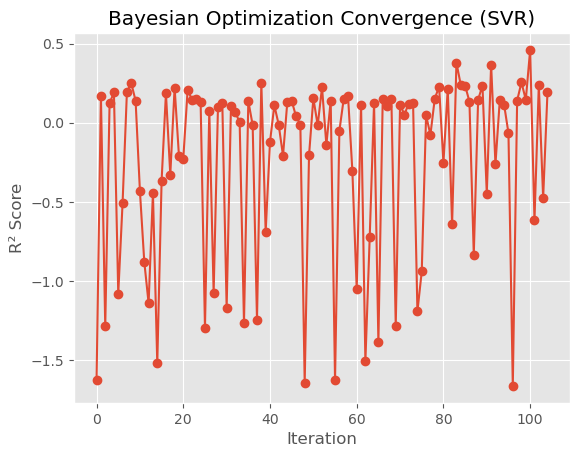

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(C, epsilon, gamma):
    # Create SVR model
    model = SVR(C=C, epsilon=epsilon, gamma=gamma)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for SVR hyperparameters
search_space = {
    "C": (0.1, 100.0),  # Regularization parameter
    "epsilon": (0.0001, 1.0),  # Tolerance margin
    "gamma": (0.0001, 1.0)  # Kernel coefficient (for RBF kernel)
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameters
best_params = optimizer.max["params"]
best_C = best_params["C"]
best_epsilon = best_params["epsilon"]
best_gamma = best_params["gamma"]
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best C: {best_C:.4f}")
print(f"Best Epsilon: {best_epsilon:.4f}")
print(f"Best Gamma: {best_gamma:.4f}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (SVR)")
plt.show()


## Decision tree regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.345


|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.3563    | 13.11     | 9.556     | 15.18     |
| 2         | 0.7375    | 19.16     | 2.404     | 4.808     |
| 3         | 0.3578    | 4.568     | 8.796     | 12.82     |
| 4         | 0.5362    | 22.12     | 1.185     | 19.46     |
| 5         | 0.7877    | 25.48     | 2.911     | 5.273     |
| 6         | 0.3563    | 29.96     | 9.5       | 2.048     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 7         | 0.7236    | 23.17     | 1.161     | 9.088     |
| 8         | 0.7851    | 22.58     | 1.056     | 2.406     |
| 9         | 0.743     | 5.737     | 1.092     | 2.126     |
| 10        | 0.3572    | 11.49     | 8.938     | 2.0       |
| 11        | 0.735     | 29.72     | 1.044     | 10.58     |
| 12        | 0.3573    | 29.74     | 9.336     | 19.61     |
| 13        | 0.7416    | 29.24     | 1.167     | 3.751     |
| 14        | 0.5352    | 3.072     | 1.382     | 19.78     |
| 15        | 0.7918    | 11.63     | 1.019     | 2.399     |
| 16        | 0.7242    | 12.27     | 1.029     | 8.131     |
| 17        | 0.7402    | 3.54      | 1.274     | 7.88      |
| 18        | 0.7851    | 16.14     | 1.098     | 2.058     |
| 19        | 0.7508    | 25.84     | 1.066     | 6.044     |
| 20        | 0.7419    | 8.017     | 1.112     | 5.839     |
| 21        | 0.776     | 22.06     | 4.453     | 2.098     |
| 22        | 0.5307    | 24.42     | 6.038     | 8.654     |
| 23    

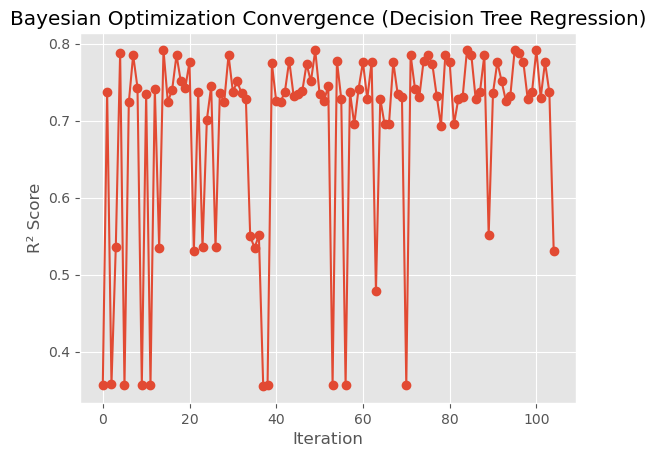

In [27]:
## Bayesian optmization for decision tree

import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(max_depth, min_samples_split, min_samples_leaf):
    # Convert parameters to integer values
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    # Create Decision Tree model
    model = DecisionTreeRegressor(max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  random_state=42)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for Decision Tree hyperparameters
search_space = {
    "max_depth": (3, 30),  # Tree depth (to control complexity)
    "min_samples_split": (2, 20),  # Minimum samples required to split
    "min_samples_leaf": (1, 10)  # Minimum samples per leaf
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameters
best_params = optimizer.max["params"]
best_max_depth = int(best_params["max_depth"])
best_min_samples_split = int(best_params["min_samples_split"])
best_min_samples_leaf = int(best_params["min_samples_leaf"])
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (Decision Tree Regression)")
plt.show()


## Random forest regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 500, 1)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  r2_train   r2_test
399           499  0.827988  0.364376
398           498  0.828002  0.363823
394           494  0.827991  0.363498
395           495  0.828003  0.363433
397           497  0.827993  0.363177
396           496  0.828019  0.362756
393           493  0.827985  0.362439
392           492  0.827987  0.361903
391           491  0.827976  0.361614
256           356  0.828381  0.361514


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.04367   | 14.36     | 9.556     | 15.18     | 319.4     |
| 2         | 0.7746    | 8.9       | 2.404     | 3.046     | 439.8     |
| 3         | 0.3397    | 20.03     | 7.373     | 2.371     | 486.5     |
| 4         | 0.7659    | 25.81     | 2.911     | 5.273     | 132.5     |
| 5         | 0.5816    | 12.61     | 5.723     | 9.775     | 181.1     |
| 6         | 0.7573    | 8.895     | 3.426     | 3.797     | 439.3     |
| 7         | 0.4615    | 5.089     | 6.546     | 14.64     | 109.0     |
| 8         | 0.5655    | 29.06     | 2.285     | 19.08     | 151.5     |
| 9         | 0.7747    | 29.81     | 2.728     | 2.465     | 427.0     |
| 10        | 0.7748    | 10.28     | 2.925     | 2.323     | 405.2     |
| 11        | 0.5591    | 28.7      | 1.4       | 18.12     | 394.3     |
| 12        | 0.5775    | 29.81     | 5.716     | 2.213     | 231.4     |
| 13        | 0.3873    | 28.53     | 7.797     | 3.134     | 50.94     |
| 14        | 0.778     | 5.909     | 

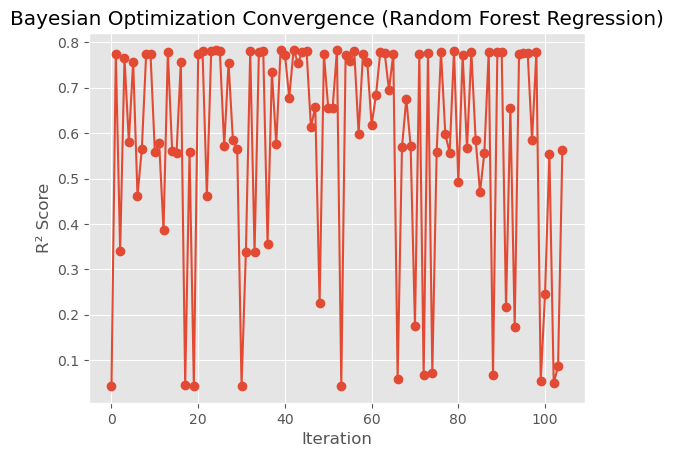

In [28]:
## Bayesian optmization for random forest

import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    # Convert parameters to integer values
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    # Create Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  random_state=42, n_jobs=-1)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for Random Forest hyperparameters
search_space = {
    "n_estimators": (50, 500),  # Number of trees
    "max_depth": (5, 30),  # Tree depth (to control complexity)
    "min_samples_split": (2, 20),  # Minimum samples required to split
    "min_samples_leaf": (1, 10)  # Minimum samples per leaf
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameters
best_params = optimizer.max["params"]
best_n_estimators = int(best_params["n_estimators"])
best_max_depth = int(best_params["max_depth"])
best_min_samples_split = int(best_params["min_samples_split"])
best_min_samples_leaf = int(best_params["min_samples_leaf"])
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Number of Estimators: {best_n_estimators}")
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (Random Forest Regression)")
plt.show()


## Gradient bossting regression

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828356  0.359013
25           350  0.828335  0.358900
27           370  0.828383  0.357435
24           340  0.828250  0.356018
28           380  0.828319  0.355595
21           310  0.828279  0.353805
29           390  0.828278  0.353770
30           400  0.828331  0.353289
23           330  0.828231  0.352651
22           320  0.828328  0.351572


|   iter    |  target   | learni... | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.7913    | 0.1186    | 14.41     | 15.18     | 319.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 2         | 0.7757    | 0.05525   | 4.872     | 3.046     | 439.8     |
| 3         | 0.775     | 0.1843    | 11.5      | 2.371     | 486.5     |
| 4         | 0.7767    | 0.2514    | 5.548     | 5.273     | 132.5     |
| 5         | 0.7852    | 0.09823   | 9.297     | 9.775     | 181.1     |
| 6         | 0.7917    | 0.2804    | 13.31     | 14.78     | 267.0     |
| 7         | 0.7783    | 0.2115    | 3.158     | 2.17      | 302.0     |
| 8         | 0.7913    | 0.2599    | 13.8      | 15.66     | 266.5     |
| 9         | 0.7698    | 0.09367   | 8.513     | 2.464     | 256.7     |
| 10        | 0.787     | 0.1332    | 12.11     | 18.19     | 274.9     |
| 11        | 0.786     | 0.134     | 13.34     | 14.88     | 329.0     |
| 12        | 0.7853    | 0.2836    | 5.063     | 19.49     | 317.0     |
| 13        | 0.7726    | 0.1764    | 14.89     | 5.48      | 319.5     |
| 14        | 0.7871    | 0.04816   | 12.22     | 19.51     | 321.8     |
| 15        | 0.7837    | 0.2699    | 

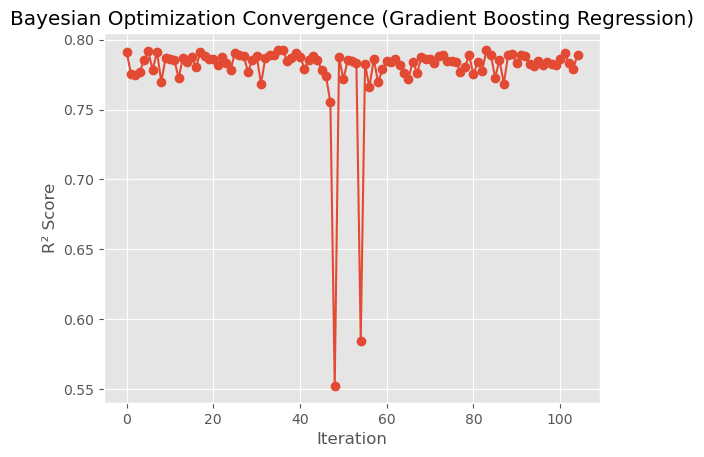

In [30]:
## Beyasian optimzation for Gradient boosting regression

import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(n_estimators, learning_rate, max_depth, min_samples_split):
    # Convert parameters to integer values where needed
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)

    # Create Gradient Boosting Regressor model
    model = GradientBoostingRegressor(n_estimators=n_estimators, 
                                      learning_rate=learning_rate, 
                                      max_depth=max_depth, 
                                      min_samples_split=min_samples_split, 
                                      random_state=42)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for Gradient Boosting hyperparameters
search_space = {
    "n_estimators": (50, 500),  # Number of boosting rounds
    "learning_rate": (0.01, 0.3),  # Step size shrinkage
    "max_depth": (3, 15),  # Tree depth (controls complexity)
    "min_samples_split": (2, 20)  # Minimum samples required to split
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameters
best_params = optimizer.max["params"]
best_n_estimators = int(best_params["n_estimators"])
best_learning_rate = best_params["learning_rate"]
best_max_depth = int(best_params["max_depth"])
best_min_samples_split = int(best_params["min_samples_split"])
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Number of Estimators: {best_n_estimators}")
print(f"Best Learning Rate: {best_learning_rate:.4f}")
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (Gradient Boosting Regression)")
plt.show()


## K-nearest Neighbors Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
11           12  0.622576  0.563464
13           14  0.569965  0.559169
12           13  0.585706  0.552137
10           11  0.671771  0.551224
3             4  0.797990  0.550191
15           16  0.497198  0.549163
9            10  0.690803  0.545678
0             1  0.785036  0.543855
14           15  0.528239  0.540192
8             9  0.720958  0.496741


|   iter    |  target   | n_neig... |     p     |
-------------------------------------------------
| 1         | 0.7798    | 19.35     | 1.951     |
| 2         | 0.7526    | 36.87     | 1.599     |
| 3         | 0.789     | 8.645     | 1.156     |
| 4         | 0.7574    | 3.846     | 1.866     |
| 5         | 0.762     | 30.45     | 1.708     |
| 6         | 0.789     | 8.629     | 1.226     |
| 7         | 0.788     | 12.66     | 1.937     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 8         | 0.7581    | 49.98     | 1.076     |
| 9         | 0.7757    | 23.92     | 1.001     |
| 10        | 0.7897    | 10.35     | 1.954     |
| 11        | 0.7821    | 15.81     | 1.005     |
| 12        | 0.7886    | 11.34     | 1.005     |
| 13        | 0.7896    | 9.795     | 1.036     |
| 14        | 0.7896    | 9.267     | 1.967     |
| 15        | 0.7896    | 9.565     | 1.542     |
| 16        | 0.7886    | 11.25     | 1.983     |
| 17        | 0.7896    | 9.778     | 1.986     |
| 18        | 0.7835    | 14.27     | 1.999     |
| 19        | 0.7575    | 43.84     | 1.994     |
| 20        | 0.786     | 13.21     | 1.0       |
| 21        | 0.7897    | 10.32     | 1.301     |
| 22        | 0.789     | 8.511     | 1.999     |
| 23        | 0.7897    | 10.13     | 1.647     |
| 24        | 0.7897    | 10.34     | 1.014     |
| 25        | 0.7896    | 9.231     | 1.123     |
| 26        | 0.7896    | 9.149     | 1.566     |
| 27        | 0.7897    | 10.09     | 1.972     |


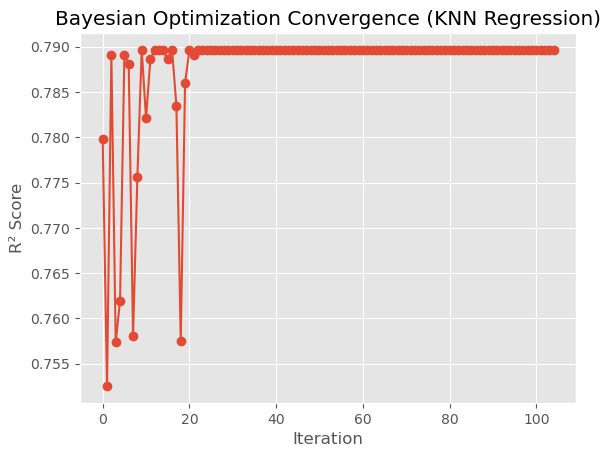

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Define the objective function for Bayesian Optimization
def objective(n_neighbors, p):
    # Convert n_neighbors to integer
    n_neighbors = int(n_neighbors)
    p = int(p)

    # Create KNN Regressor model
    model = KNeighborsRegressor(n_neighbors=n_neighbors, 
                                weights="distance",  # Using distance-based weighting
                                p=p)

    # Perform cross-validation to evaluate R²
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    mean_r2 = np.mean(scores)

    return mean_r2  # Maximizing R²

# Define the search space for KNN hyperparameters
search_space = {
    "n_neighbors": (1, 50),  # Number of neighbors
    "p": (1, 2)  # 1 = Manhattan distance, 2 = Euclidean distance
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(f=objective, pbounds=search_space, random_state=42)
optimizer.maximize(init_points=5, n_iter=100)  # 5 random starts, 25 optimization steps

# Get Best Hyperparameters
best_params = optimizer.max["params"]
best_n_neighbors = int(best_params["n_neighbors"])
best_p = int(best_params["p"])
best_r2 = optimizer.max["target"]

# Print Results
print(f"Best Number of Neighbors: {best_n_neighbors}")
print(f"Best Distance Metric (p): {best_p}")
print(f"Best R² Score: {best_r2:.4f}")

# Plot Optimization Convergence
plt.plot([res["target"] for res in optimizer.res], marker="o")
plt.xlabel("Iteration")
plt.ylabel("R² Score")
plt.title("Bayesian Optimization Convergence (KNN Regression)")
plt.show()


## XGBregression

In [33]:
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
162            110            0.1          3  0.829460  0.350879
322            120            0.1          3  0.829509  0.350678
2              100            0.1          3  0.829391  0.350649
482            130            0.1          3  0.829558  0.350111
642            140            0.1          3  0.829604  0.349352
802            150            0.1          3  0.829653  0.349190
1922           220            0.1          3  0.829753  0.348918
18             100            0.2          3  0.829744  0.348848
2082           230            0.1          3  0.829758  0.348825
962            160            0.1          3  0.829678  0.348701


## Adaboost regression

In [34]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
        model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
        # Train the model
        model.fit(X_train, y_train.ravel())
            
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
            
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        # Append results
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  learning_rate  r2_train   r2_test
0             100            0.1  0.772376  0.749187
20            120            0.1  0.772376  0.749187
40            140            0.1  0.772376  0.749187
50            150            0.1  0.772376  0.749187
60            160            0.1  0.772376  0.749187
70            170            0.1  0.772376  0.749187
80            180            0.1  0.772376  0.749187
90            190            0.1  0.772376  0.749187
100           200            0.1  0.772376  0.749187
120           220            0.1  0.772376  0.749187


## K-fold validation with adaboosting regression

In [35]:
from sklearn.model_selection import KFold

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = scaler_X.fit_transform(DPP_DTT_X.iloc[train_index]), scaler_X.transform(DPP_DTT_X.iloc[test_index])
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.823740     0.677670
1   3      0.785539     0.770422
2   4      0.785767     0.781034
3   5      0.783540     0.748757
4   6      0.781494     0.696720
5   7      0.781461     0.681043
6   8      0.781020     0.715883
7   9      0.778588     0.672317
8  10      0.779752     0.514409


## K-fold validation with SVR regression

In [36]:
# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the SVR Model
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = scaler_X.fit_transform(DPP_DTT_X.iloc[train_index]), scaler_X.transform(DPP_DTT_X.iloc[test_index])
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the SVR model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results with SVR:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results with SVR:
    K  Avg Train R²  Avg Test R²
0   2      0.574111     0.533175
1   3      0.625652     0.616312
2   4      0.657891     0.657485
3   5      0.653861     0.621283
4   6      0.658302     0.656897
5   7      0.660087     0.627855
6   8      0.667225     0.669149
7   9      0.664545     0.654423
8  10      0.666558     0.533662


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

## Important x values from adaboosting regresion

In [37]:
# Example dataset (replace with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.590273
5            solvent_boiling_point    0.136757
6               insulating_polymer    0.115235
4        film_deposition_type_spin    0.095113
2               polymer_dispersity    0.047004
7           substrate_pretreat_sam    0.009256
0           solution_concentration    0.006362
3                     post_process    0.000000
8  solution_treatment_poor_solvent    0.000000


## Important x values from SVR regresion

In [38]:
# Import necessary libraries
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Initialize and train the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importance (Descending Order):
                           Feature  Importance
6               insulating_polymer    0.466257
4        film_deposition_type_spin    0.277568
5            solvent_boiling_point    0.239619
1                       polymer_mw    0.199365
2               polymer_dispersity    0.166050
7           substrate_pretreat_sam    0.046993
0           solution_concentration    0.014996
3                     post_process    0.000000
8  solution_treatment_poor_solvent    0.000000


## w/ Stnadard scaler X and y

In [39]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## Linear regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.517
R² score for test set: 0.249


## Polynomial regerssion

Degree 1: R² train = 0.517, R² test = 0.249
Degree 2: R² train = 0.363, R² test = -1408425446376480702464.000
Degree 3: R² train = 0.830, R² test = 0.340
Degree 4: R² train = 0.830, R² test = -2076346794148280.750
Degree 5: R² train = 0.830, R² test = -565279.485
Degree 6: R² train = 0.830, R² test = -28103.744


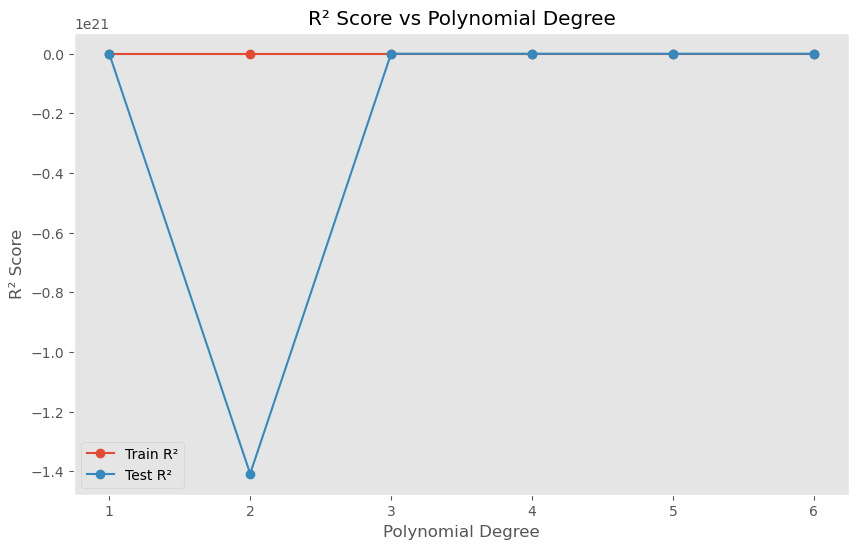

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()

## Ridge regression

Alpha 0.1: R² train = 0.517, R² test = 0.250
Alpha 0.2: R² train = 0.517, R² test = 0.250
Alpha 0.3: R² train = 0.517, R² test = 0.251
Alpha 0.4: R² train = 0.517, R² test = 0.251
Alpha 0.5: R² train = 0.517, R² test = 0.252
Alpha 0.6: R² train = 0.517, R² test = 0.252
Alpha 0.7: R² train = 0.517, R² test = 0.252
Alpha 0.8: R² train = 0.517, R² test = 0.253
Alpha 0.9: R² train = 0.517, R² test = 0.253
Alpha 1.0: R² train = 0.517, R² test = 0.254


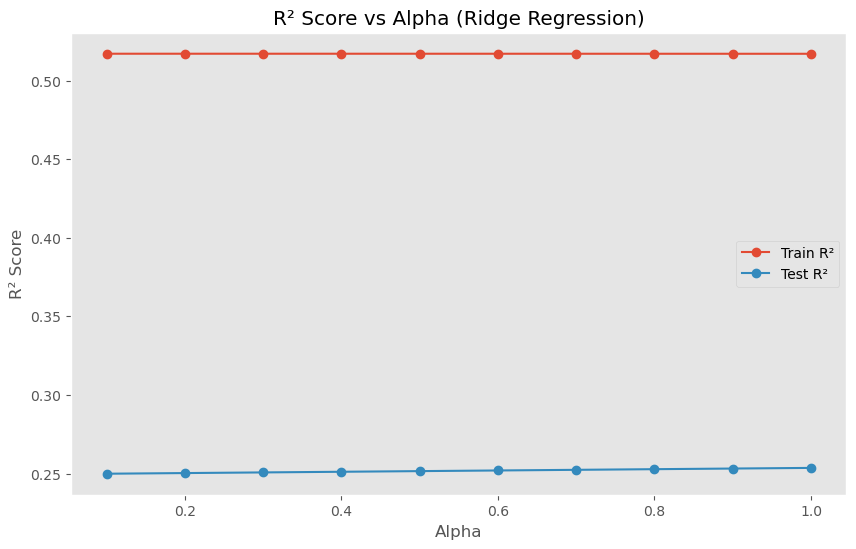

In [42]:
from sklearn.linear_model import Ridge

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()

## Lasso regression

Alpha 0.1: R² train = 0.446, R² test = 0.244
Alpha 0.2: R² train = 0.358, R² test = 0.212
Alpha 0.3: R² train = 0.280, R² test = 0.186
Alpha 0.4: R² train = 0.190, R² test = 0.113
Alpha 0.5: R² train = 0.095, R² test = 0.043
Alpha 0.6: R² train = 0.000, R² test = -0.040
Alpha 0.7: R² train = 0.000, R² test = -0.040
Alpha 0.8: R² train = 0.000, R² test = -0.040
Alpha 0.9: R² train = 0.000, R² test = -0.040
Alpha 1.0: R² train = 0.000, R² test = -0.040


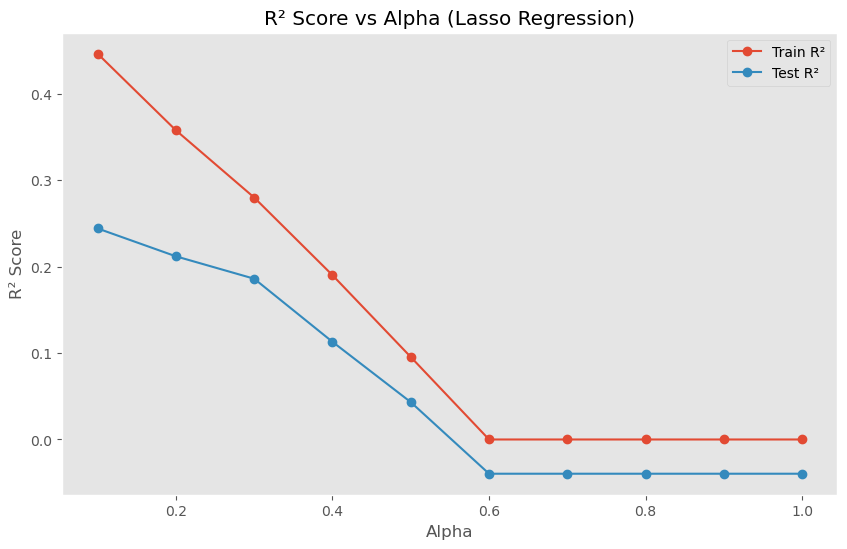

In [43]:
from sklearn.linear_model import Lasso

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()

## Elasticnet regression

In [44]:
from sklearn.linear_model import ElasticNet

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.510432  0.293938
1     0.1       0.2  0.505988  0.292326
2     0.1       0.3  0.500939  0.290847
3     0.1       0.4  0.495207  0.289280
4     0.1       0.5  0.488192  0.286098
5     0.1       0.6  0.479802  0.281208
6     0.1       0.7  0.472308  0.275591
7     0.1       0.8  0.464216  0.268273
8     0.1       0.9  0.455196  0.258485
9     0.1       1.0  0.446367  0.244181
10    0.2       0.1  0.496455  0.324116
11    0.2       0.2  0.484173  0.320236
12    0.2       0.3  0.469359  0.312790
13    0.2       0.4  0.453985  0.301699
14    0.2       0.5  0.437403  0.281255
15    0.2       0.6  0.418561  0.254348
16    0.2       0.7  0.405169  0.247062
17    0.2       0.8  0.389730  0.234870
18    0.2       0.9  0.372447  0.218446
19    0.2       1.0  0.357757  0.211938
20    0.3       0.1  0.479436  0.343306
21    0.3       0.2  0.458399  0.332835
22    0.3       0.3  0.435040  0.312887
23    0.3       0.4  0.408315  0.278456


## Support Vector Regression (SVR)

In [45]:
from sklearn.svm import SVR

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train.ravel())  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

    C  epsilon  r2_train   r2_test
0   1      0.1  0.800767  0.489052
1   1      0.2  0.795069  0.443310
2   1      0.3  0.777027  0.330993
3   1      0.4  0.752844  0.326511
4   1      0.5  0.718498  0.227110
5   1      0.6  0.661513  0.064592
6   1      0.7  0.570456 -0.110666
7   1      0.8  0.465749 -0.313254
8   1      0.9  0.350932 -0.628646
9   1      1.0  0.201814 -0.971234
10  1      1.1  0.025247 -1.339481
11  2      0.1  0.814502  0.190381
12  2      0.2  0.806819  0.229159
13  2      0.3  0.795777  0.260046
14  2      0.4  0.773608  0.158537
15  2      0.5  0.741251  0.118960
16  2      0.6  0.678729 -0.006357
17  2      0.7  0.599213 -0.189427
18  2      0.8  0.509134 -0.474571
19  2      0.9  0.384633 -0.769967
20  2      1.0  0.239465 -1.067643
21  2      1.1  0.078572 -1.402873
22  3      0.1  0.814768  0.121532
23  3      0.2  0.811286  0.141155
24  3      0.3  0.799522  0.174988
25  3      0.4  0.774873  0.166118
26  3      0.5  0.744747  0.033746
27  3      0.6  0.69

## Deicision tree regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.347


## Random forest regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.828392  0.359303
26           360  0.828359  0.359234
27           370  0.828390  0.357655
24           340  0.828311  0.356541
28           380  0.828331  0.355771
21           310  0.828337  0.354332
29           390  0.828292  0.353939
30           400  0.828345  0.353435
23           330  0.828340  0.353361
22           320  0.828388  0.352090


## Gradient boosting regression

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.828392  0.359303
26           360  0.828359  0.359234
27           370  0.828390  0.357655
24           340  0.828311  0.356541
28           380  0.828331  0.355771
21           310  0.828337  0.354332
29           390  0.828292  0.353939
30           400  0.828345  0.353435
23           330  0.828340  0.353361
22           320  0.828388  0.352090


## K-nearest Neighbors Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
11           12  0.622589  0.563431
13           14  0.569980  0.559134
12           13  0.585739  0.552068
10           11  0.671771  0.551224
3             4  0.798011  0.550164
15           16  0.497215  0.549129
9            10  0.690831  0.545629
0             1  0.785036  0.543855
14           15  0.528268  0.540134
8             9  0.720971  0.496742


## XGBregression

In [50]:
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
162            110            0.1          3  0.829460  0.350879
322            120            0.1          3  0.829509  0.350678
2              100            0.1          3  0.829391  0.350649
482            130            0.1          3  0.829558  0.350111
642            140            0.1          3  0.829604  0.349352
802            150            0.1          3  0.829653  0.349190
1922           220            0.1          3  0.829753  0.348917
18             100            0.2          3  0.829744  0.348848
2082           230            0.1          3  0.829758  0.348825
962            160            0.1          3  0.829678  0.348701


## Adaboost regression

In [51]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
        model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
        # Train the model
        model.fit(X_train, y_train.ravel())
            
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
            
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        # Append results
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))

Top 10 configurations by Test R²:
     n_estimators  learning_rate  r2_train   r2_test
0             100            0.1  0.772291  0.748715
20            120            0.1  0.772291  0.748715
40            140            0.1  0.772291  0.748715
50            150            0.1  0.772291  0.748715
60            160            0.1  0.772291  0.748715
70            170            0.1  0.772291  0.748715
80            180            0.1  0.772291  0.748715
90            190            0.1  0.772291  0.748715
100           200            0.1  0.772291  0.748715
120           220            0.1  0.772291  0.748715


## K-fold validation with Adaboost regression

In [52]:
from sklearn.model_selection import KFold

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = scaler_X.fit_transform(DPP_DTT_X.iloc[train_index]), scaler_X.transform(DPP_DTT_X.iloc[test_index])
        y_train, y_test = scaler_y.fit_transform(DPP_DTT_Y.iloc[train_index]), scaler_y.transform(DPP_DTT_Y.iloc[test_index])
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.824376     0.674989
1   3      0.786438     0.772795
2   4      0.785548     0.781127
3   5      0.783777     0.747490
4   6      0.781450     0.696546
5   7      0.781739     0.676530
6   8      0.780830     0.715180
7   9      0.779165     0.673391
8  10      0.779663     0.527358


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
